In [94]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import log, cos , pi, exp, cosh, lambdify, diff, symbols

# Método de Newton (Funções)

In [81]:
#Define a função que calcula a derivada da função
def der(funcao):
    t = symbols('t')
    der_f = diff(funcao, t)
    return der_f

#Define a função que usa a derivada para encontrar a raíz da função pelo método de Newton
#Alguns valores como tolerância e iterações máximas vêm com valores padrões que podem ser mudados
def new(funcao, xr_init=0, tol=10e-3, imax=300):
    t = symbols('t')
    funcao_lambda = lambdify(t, funcao)
    der_f = der(funcao)
    der_f_lambda = lambdify(t, der_f)

    lista_deltax = []
    xr = xr_init
    fx = funcao_lambda(xr)
    dfx = der_f_lambda(xr)
    i = 1
    deltax = -(fx / dfx) if dfx != 0 else np.inf

    for i in range(1, imax):
        lista_deltax.append(deltax)
        if abs(deltax) <= tol or abs(fx) <= tol:
            break
        xr += deltax
        fx = funcao_lambda(xr)
        dfx = der_f_lambda(xr)
        deltax = -(fx / dfx) if dfx != 0 else np.inf

    return {'i': i, 'xr': xr, 'deltax':deltax, 'lista_deltax': lista_deltax}


# Método da bisecção (Funções)

In [66]:
#Função geral do cálculo do método da bissecção
def bis(funcao, xi=-1000.0, xs=1000.0, precisao=10e-3, imax=300):
    lista_deltax = []
    t = symbols('t')
    funcao_lambda = lambdify(t, funcao)
    xr = (xi + xs) / 2
    bis = funcao_lambda(xr)
    deltax = abs(xs - xi) / 2
    lista_deltax.append(deltax)

    for i in range(imax):
        fi = funcao_lambda(xi)
        fs = funcao_lambda(xs)
        xr = (xi + xs) / 2
        bis = funcao_lambda(xr)
        deltax = abs(xs - xi) / 2
        lista_deltax.append(deltax)

        if fi * fs > 0:
            print('Infelizmente não há raíz para a função nesse intervalo de valores, valores padrão:')
            break

        if deltax < precisao and abs(bis) < precisao:
            break
        
        if bis * fs > 0:
            xs = xr
            fs = bis
        else:
            xi = xr
            fi = bis
            
    return {'i': i, 'xr': xr, 'deltax': deltax, 'lista_deltax': lista_deltax}


# Comparação dos métodos

#### Função comparação

In [87]:
#Define a função que apresenta os resultados
def plot_raiz(funcao, xr, lista_deltax1, lista_deltax2):
    t = symbols('t')
    funcao_lambda = lambdify(t, funcao)

    # Intervalo para plotagem da função
    t_vals = np.linspace(-5 * xr, 5 * xr, 1000)
    f_vals = funcao_lambda(t_vals)

    # Plot da função
    sns.set(style="darkgrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.plot(t_vals, f_vals, label='Função')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.set_title('Função e Raiz')
    
    # Plot da derivada
    der_f = der(funcao)
    der_f_lambda = lambdify(t, der_f)
    df_vals = der_f_lambda(t_vals)
    ax1.plot(t_vals, df_vals, label='Derivada')

    # Plot do ponto da raiz
    ax1.plot(xr, funcao_lambda(xr), 'ro', label='Raiz')
    ax1.annotate(f'Raiz: ({xr:.2f}, {funcao_lambda(xr):.2f})', (xr, funcao_lambda(xr)), textcoords="offset points", xytext=(10,10), ha='center')

    ax1.legend()

    # Plot do gráfico de iterações e deltax
    ax2.plot(range(1, len(lista_deltax1) + 1), lista_deltax1, marker='o')
    ax2.plot(range(1, len(lista_deltax2) + 1), lista_deltax2, marker='o')
    ax2.set_xlabel('Iterações')
    ax2.set_ylabel('Deltax')
    ax2.set_title('Iterações vs Deltax')

    plt.tight_layout()
    plt.show()

#### Problema 1

{'i': 3, 'xr': 0.43379877944864703, 'deltax': -0.0026721277475043573, 'lista_deltax': [-0.5075117235747714, -0.0586894969765816, -0.0026721277475043573]}
{'i': 4, 'xr': 0.4296875, 'deltax': 0.0078125, 'lista_deltax': [0.125, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]}


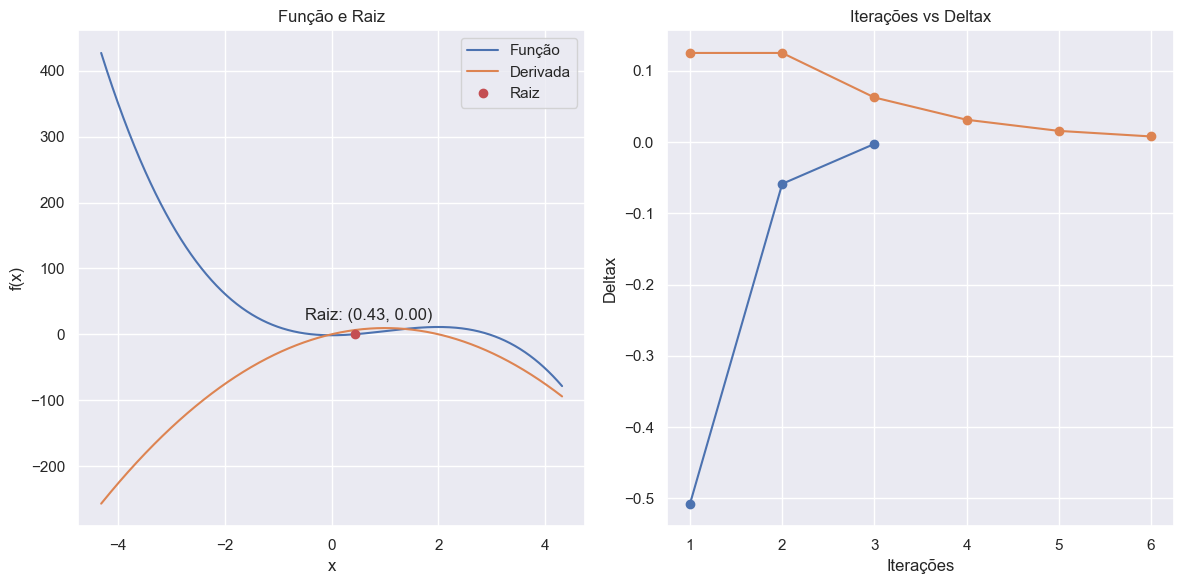

In [72]:
# Define a função que cria a função altura em reservatório
def prof(r):
    t = symbols('t')
    return pi * t ** 2 * (3 * r - t) - 1.5

funcao_1 = prof(1)

newton_raiz1 = new(funcao_1, xr_init=1)
bisect_raiz1 = bis(funcao_1, xi=0.25, xs=0.5)

print(newton_raiz1)
print(bisect_raiz1)

plot_raiz(funcao_1, (newton_raiz1['xr'] + bisect_raiz1['xr']) / 2, newton_raiz1['lista_deltax'], bisect_raiz1['lista_deltax'])

#### Problema 2

{'i': 1, 'xr': 0, 'deltax': inf, 'lista_deltax': [inf]}
{'i': 12, 'xr': 268.328857421875, 'deltax': 0.006103515625, 'lista_deltax': [25.0, 25.0, 12.5, 6.25, 3.125, 1.5625, 0.78125, 0.390625, 0.1953125, 0.09765625, 0.048828125, 0.0244140625, 0.01220703125, 0.006103515625]}


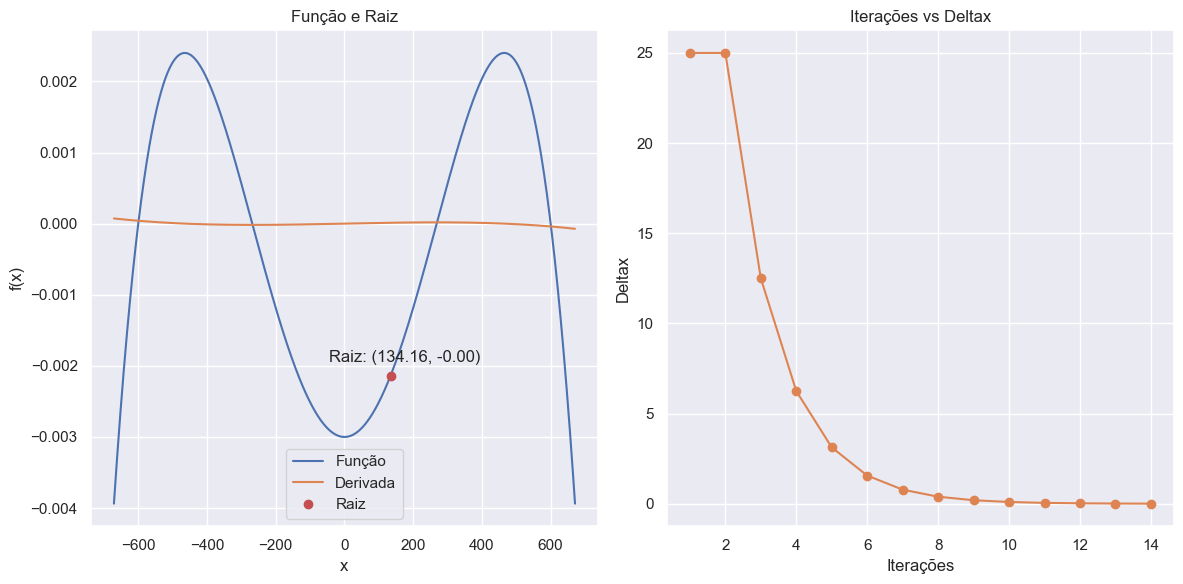

In [90]:
# Define a função que cria a função deflecção
def deflex(w0, l, e, i):
    t = symbols('t')
    return ((-5 * t ** 4 * w0) + (6 * l ** 2 * t ** 2 * w0) - (l ** 4 * w0)) / (120 * e * i * l)

funcao_2 = deflex(2.5, 600, 50000, 30000)

newton_raiz2 = new(funcao_2, xr_init=0)
bisect_raiz2 = bis(funcao_2, xi=250, xs=300)

print(newton_raiz2)
print(bisect_raiz2)

plot_raiz(funcao_2, (newton_raiz2['xr'] + bisect_raiz2['xr']) / 2, newton_raiz2['lista_deltax'], bisect_raiz2['lista_deltax'])

#Como a derivada da função nunca atinge o 0 em f(x), o método de Newton não funciona para ela

#### Problema 3

{'i': 4, 'xr': 0.6022921549565924, 'deltax': 6.330725346377206e-05, 'lista_deltax': [0.45454545454545453, 0.13692544291401143, 0.010821257497126369, 6.330725346377206e-05]}
{'i': 6, 'xr': 0.6015625, 'deltax': 0.0078125, 'lista_deltax': [0.5, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]}


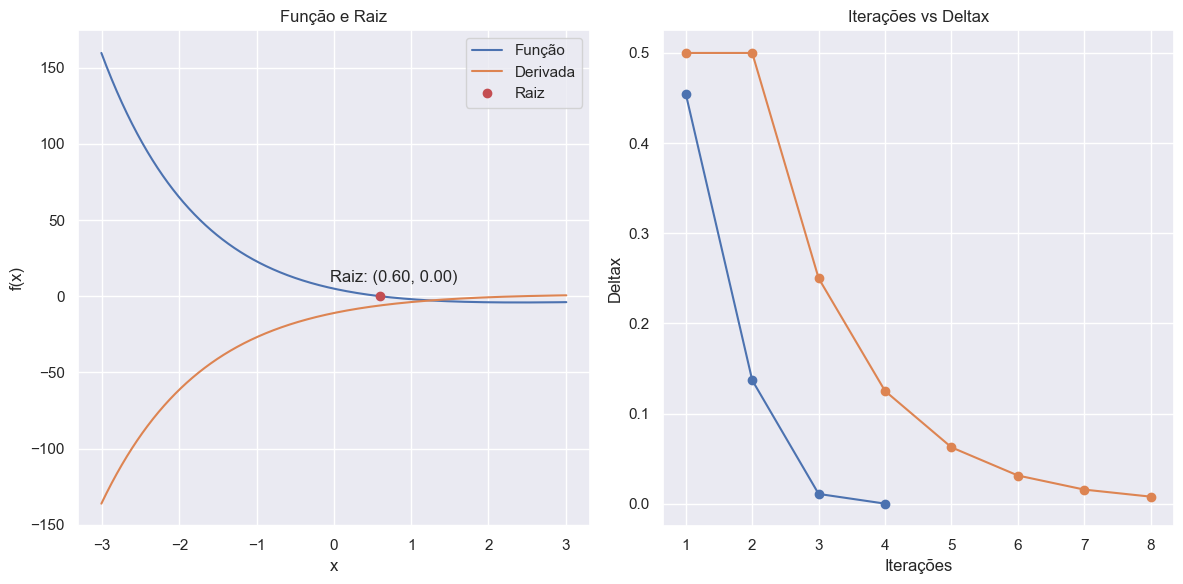

In [93]:
# Define a função que cria a função concentração de oxigênio
def oxi():
    t = symbols('t')
    return 5 - 20 * (exp(-0.2 * t) - exp(-0.75 * t))

funcao_3 = oxi()

newton_raiz3 = new(funcao_3, xr_init=0)
bisect_raiz3 = bis(funcao_3, xi=0, xs=1)

print(newton_raiz3)
print(bisect_raiz3)

plot_raiz(funcao_3, (newton_raiz3['xr'] + bisect_raiz3['xr']) / 2, newton_raiz3['lista_deltax'], bisect_raiz3['lista_deltax'])

#### Problema 4

{'i': 4, 'xr': 0.6022921549565924, 'deltax': 6.330725346377206e-05, 'lista_deltax': [0.45454545454545453, 0.13692544291401143, 0.010821257497126369, 6.330725346377206e-05]}
{'i': 6, 'xr': 0.6015625, 'deltax': 0.0078125, 'lista_deltax': [0.5, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]}


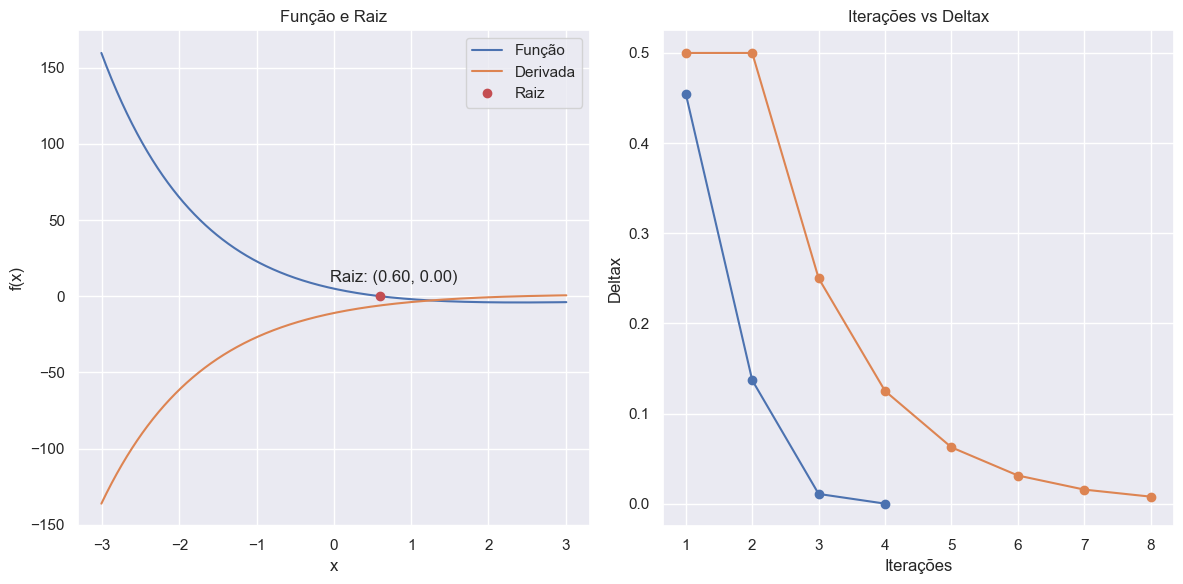

In [95]:
# Define a função que cria a função catenária
def cat():
    t = symbols('t')
    return (t / 12) * cosh((12 / t) * 50) + 6 - (t / 12) - 15

funcao_4 = oxi()

newton_raiz4 = new(funcao_4, xr_init=0)
bisect_raiz4 = bis(funcao_4, xi=0, xs=1)

print(newton_raiz4)
print(bisect_raiz4)

plot_raiz(funcao_4, (newton_raiz4['xr'] + bisect_raiz4['xr']) / 2, newton_raiz4['lista_deltax'], bisect_raiz4['lista_deltax'])

#### Problema 5

{'i': 5, 'xr': 25.942467396815108, 'deltax': -7.441453266584975e-05, 'lista_deltax': [35.14150566705804, -8.272316497919753, -1.8614702290455856, -0.06525154327759294, -7.441453266584975e-05]}
{'i': 17, 'xr': 25.94249725341797, 'deltax': 0.00011444091796875, 'lista_deltax': [15.0, 15.0, 7.5, 3.75, 1.875, 0.9375, 0.46875, 0.234375, 0.1171875, 0.05859375, 0.029296875, 0.0146484375, 0.00732421875, 0.003662109375, 0.0018310546875, 0.00091552734375, 0.000457763671875, 0.0002288818359375, 0.00011444091796875]}


<lambdifygenerated-150>:2: RuntimeWarning: invalid value encountered in log
  return -9.8*t + 2200*log(160000.0/(160000.0 - 2680*t)) - 1000


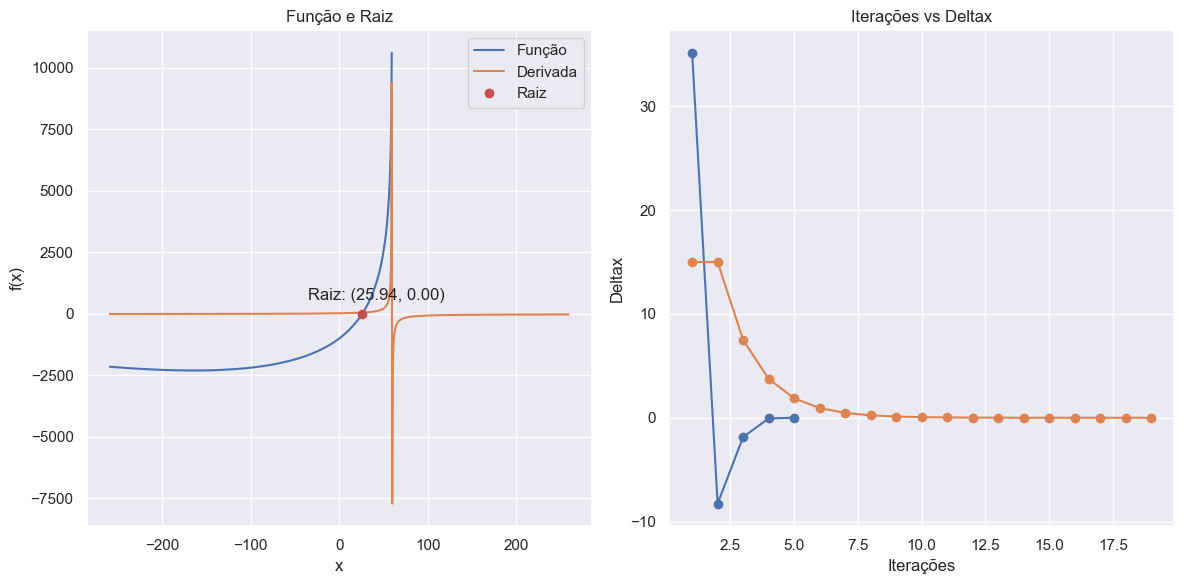

In [71]:
#Define a função que cria a função velocidade de escape
def vel(u, g, m0, q, v):
    t = symbols('t')
    return u * log(m0 / (m0 - q * t)) - g * t - v

funcao_5 = vel(2200, 9.8, 1.6e5, 2680, 1000)

newton_raiz5 = new(funcao_5, xr_init=1)
bisect_raiz5 = bis(funcao_5, xi=0, xs=30)

print(newton_raiz5)
print(bisect_raiz5)

plot_raiz(funcao_5, (newton_raiz5['xr'] + bisect_raiz5['xr']) / 2, newton_raiz5['lista_deltax'], bisect_raiz5['lista_deltax'])

#### Problema 6

{'i': 3, 'xr': 2.545370647852401, 'deltax': 0.00019523924582080815, 'lista_deltax': [1.5314691539494225, 0.013901493902978795, 0.00019523924582080815]}
{'i': 12, 'xr': 2.5455322265625, 'deltax': 0.0003662109375, 'lista_deltax': [1.5, 1.5, 0.75, 0.375, 0.1875, 0.09375, 0.046875, 0.0234375, 0.01171875, 0.005859375, 0.0029296875, 0.00146484375, 0.000732421875, 0.0003662109375]}


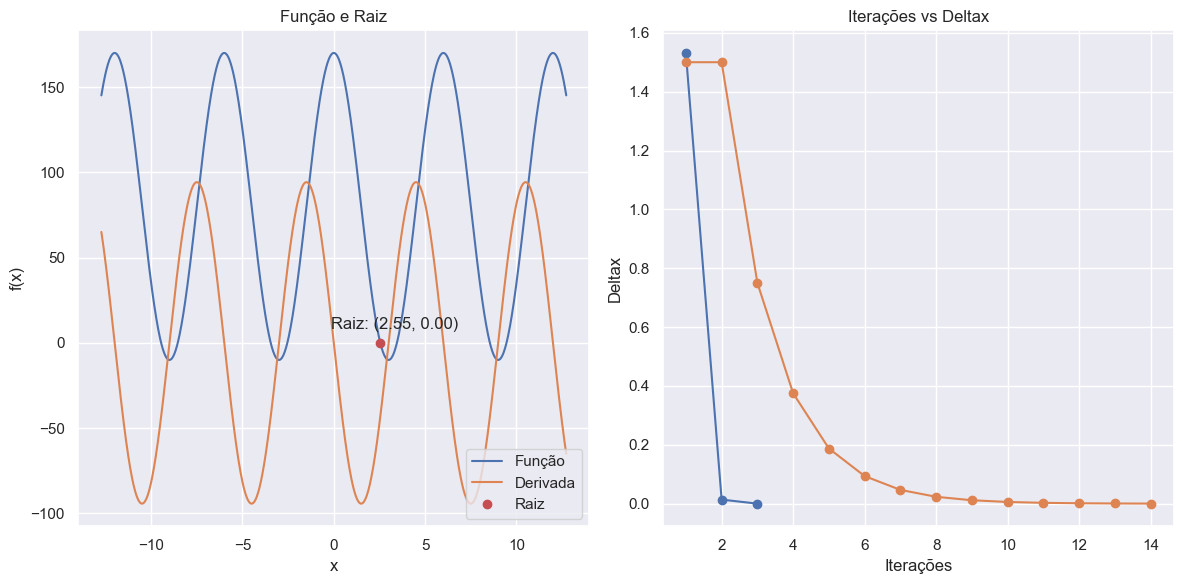

In [97]:
#Define a função que cria a distância
def dis():
    t = symbols('t')
    return 80 + 90 * cos(pi / 3 * t) # type: ignore

funcao_6 = dis()

newton_raiz6 = new(funcao_6, xr_init=1)
bisect_raiz6 = bis(funcao_6, xi=0, xs=3)

print(newton_raiz6)
print(bisect_raiz6)

plot_raiz(funcao_6, (newton_raiz6['xr'] + bisect_raiz6['xr']) / 2, newton_raiz6['lista_deltax'], bisect_raiz6['lista_deltax'])